# Problem Statement

LendingClub is the world’s leading online marketplace for connecting borrowers and investors.

There are 2 types of risks are associated with the decision:
1. Does not want to loose borrower who is likely to pay all is dues.
2. Does not want to lend money to borrower who is likely to default i.e not pay back the loans

Our objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 

In [1]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data sets to pandas dataframe variable
loan=pd.read_csv('loan.csv', encoding='ISO-8859-1')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#checking number of rows and columns in data set
loan.shape

(39717, 111)

In [4]:
#updating display setting for viewing coulumns upto 500 at a time
pd.set_option('display.max_columns', 500)

In [5]:
#Checking null values present in each column of dataset.
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#Checking null values present in each column of dataset in percentage.
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [7]:
#As per above we can see there are columns which have 100% Null values, let us have a look of top 10 columns.
#Also Ensuring no critical business column have all null values 
loan.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   10.65%       162.87     B        B2                        NaN  10+ years   
1   15.27%        59.83     C        C4                      Ryder   < 1 year   
2   15.96%        84.33     C        C5                        NaN  10+ years   
3   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5   University Medical Group     1 year   
5    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%       170.08     C        C5  Southern Star Photography    8 years   
7   18.64%       109.43     E        E1            MKC Accounting     9 years   
8   21.28%       152.39     F        F2                        NaN    4 years   
9   12.69%       121.45     B        B5                  Starbucks   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-11   Fully Paid   
7           RENT     48000.0     Source Verified  Dec-11   Fully Paid   
8            OWN     40000.0     Source Verified  Dec-11  Charged Off   
9           RENT     15000.0            Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   
6          n  https://lendingclub.com/browse/loanDetail.acti...   
7          n  https://lendingclub.com/browse/loanDetail.acti...   
8          n  https://lendingclub.com/browse/loanDetail.acti...   
9          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11

In [8]:
#dropping columns which have all NULL values
loan=loan.dropna(axis=1, how='all')

In [9]:
#checking numbers of columns and rows remaining after dropping columns which had all null values.
#Now we are left with 57 columns and 39717 rows in dataset. 
loan.shape

(39717, 57)

In [10]:
##checking numbers of columns and rows remaining after dropping columns which had all null values in percentage.
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
#following columns have NULL as high as 65% to 97% and such huge data can not be retreived , thus removing these columns.
loan=loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1)

In [12]:
#checking numbers of columns and rows remaining after dropping columns which had significant null values.
#Now we are left with 54 columns and 39717 rows in dataset. 
loan.shape

(39717, 54)

In [13]:
#Checking information for left data columns 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
##checking numbers of columns and rows remaining after dropping columns which had significant null values in percentage.
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [15]:
#Id will not help us in analyzing good or bad loan so deleteing both id columns
loan=loan.drop(['id','member_id'],axis=1)

In [16]:
#Not helpful in our analysis as it does not say anything about borrower.
loan= loan.drop(['funded_amnt','funded_amnt_inv'],axis=1)

In [17]:
#sub_grade is subset of grade column, so not required as it can considered as duplicate column
#url- shows LC web page, not required as it will not add anything to our analysis
loan= loan.drop(['sub_grade','url'],axis=1)

In [18]:
#emp-title -Not helpful as job title varies from one organization to another thus cannot be categorized.
#title-Title is provide by borrower, has varied values as strings,date and numbers. It will not be helpful for us.
#desc-Not required as it will not add anything to our analysis
loan=loan.drop(['emp_title','title','desc'],axis=1)

In [19]:
#pymnt_plan -Not required it has same categorical value 'n' across all rows, which is not meaningful for our analysis
#initial_list_status - Not required it has same categorical vale 'f' across all rows, which is not meaningful for our analysis
loan= loan.drop(['pymnt_plan','initial_list_status'],axis=1)

In [20]:
#policy_code-Has same value as 1, does not show any trend
#application_type-Has same value , does not show any trend
loan= loan.drop(['policy_code','application_type'],axis=1)

In [21]:
# following columns have either all 0 or few blanks.
loan=loan.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

In [22]:
#checking numbers of columns and rows remaining after dropping columns which don't have significant impact in analysis.
#Now we are left with 36 columns and 39717 rows in dataset. 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   term                     39717 non-null  object 
 2   int_rate                 39717 non-null  object 
 3   installment              39717 non-null  float64
 4   grade                    39717 non-null  object 
 5   emp_length               38642 non-null  object 
 6   home_ownership           39717 non-null  object 
 7   annual_inc               39717 non-null  float64
 8   verification_status      39717 non-null  object 
 9   issue_d                  39717 non-null  object 
 10  loan_status              39717 non-null  object 
 11  purpose                  39717 non-null  object 
 12  zip_code                 39717 non-null  object 
 13  addr_state               39717 non-null  object 
 14  dti                   

In [23]:
#checking numbers of columns and rows remaining after dropping columns which don't have significant impact in analysis in percentage.
round(100*(loan.isnull().sum()/len(loan.index)),2)

loan_amnt                  0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collecti

In [24]:
# there are few columns which still have NULL values but % is very low thus those rows can be dropped which have 1 or more NULL values.
loan=loan.dropna(axis=0,how='any')

In [25]:
#Checking the shape of data set after cleaning the dataset
loan.shape

(37835, 36)

In [26]:
#Checking information after data cleaning
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37835 non-null  int64  
 1   term                     37835 non-null  object 
 2   int_rate                 37835 non-null  object 
 3   installment              37835 non-null  float64
 4   grade                    37835 non-null  object 
 5   emp_length               37835 non-null  object 
 6   home_ownership           37835 non-null  object 
 7   annual_inc               37835 non-null  float64
 8   verification_status      37835 non-null  object 
 9   issue_d                  37835 non-null  object 
 10  loan_status              37835 non-null  object 
 11  purpose                  37835 non-null  object 
 12  zip_code                 37835 non-null  object 
 13  addr_state               37835 non-null  object 
 14  dti                   

In [27]:
#Checking the dataset if any null values remaining in data set for any columns
#Now we have cleaned data with no null values.
round(100*(loan.isnull().sum()/len(loan.index)),2)

loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pym

In [28]:
#Checking the data types of each column
loan.dtypes

loan_amnt                    int64
term                        object
int_rate                    object
installment                float64
grade                       object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

In [29]:
#Taking a look for top few data rows for further data cleaning
loan.head()

loan_amnt        term int_rate  installment grade emp_length  \
0       5000   36 months   10.65%       162.87     B  10+ years   
1       2500   60 months   15.27%        59.83     C   < 1 year   
2       2400   36 months   15.96%        84.33     C  10+ years   
3      10000   36 months   13.49%       339.31     C  10+ years   
4       3000   60 months   12.69%        67.79     B     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

          purpose zip_code addr_state    dti  delinq_2yrs earliest_cr_line  \
0     credit_card    860xx         AZ  27.65            0           Jan-85   
1             car    309xx         GA   1.00            0           Apr-99   
2  small_business    606xx         IL   8.72            0           Nov-01   
3           other    917xx         CA  20.00            0           Feb-96   
4           other    972xx         OR  17.94            0           Jan-96   

   inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0               1         3        0      13648     83.70%          9   
1               5         3        0       1687      9.40%          4   
2               2         2        0       2956     98.50%         10   
3               1        10        0       5598        21%         37   
4               0        15        0      27783     53.90%         38   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0  
1       Apr-13           119.66             Sep-13                   0.0  
2       Jun-14           649.91             May-16                   0.0  
3       Jan-15           357.48             Apr-16                   0.0  
4       May-16            67.79             May-16                   0.0

In [30]:
#term values can be numeric, these are having months as string.Checking for all different values for this column
loan.term.value_counts()

 36 months    27498
 60 months    10337
Name: term, dtype: int64

In [31]:
#Removing the string part from "Term" column
loan.term=loan.term.apply(lambda x:int(x[:3]))

In [32]:
#Checking the reaiming different values for term column
loan.term.value_counts()

36    27498
60    10337
Name: term, dtype: int64

In [33]:
#Checking the data type for term column
loan.term.dtype

dtype('int64')

In [34]:
#Checking some data rows for further data cleaning if required
loan.head()

loan_amnt  term int_rate  installment grade emp_length home_ownership  \
0       5000    36   10.65%       162.87     B  10+ years           RENT   
1       2500    60   15.27%        59.83     C   < 1 year           RENT   
2       2400    36   15.96%        84.33     C  10+ years           RENT   
3      10000    36   13.49%       339.31     C  10+ years           RENT   
4       3000    60   12.69%        67.79     B     1 year           RENT   

   annual_inc verification_status issue_d  loan_status         purpose  \
0     24000.0            Verified  Dec-11   Fully Paid     credit_card   
1     30000.0     Source Verified  Dec-11  Charged Off             car   
2     12252.0        Not Verified  Dec-11   Fully Paid  small_business   
3     49200.0     Source Verified  Dec-11   Fully Paid           other   
4     80000.0     Source Verified  Dec-11      Current           other   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65            0           Jan-85               1   
1    309xx         GA   1.00            0           Apr-99               5   
2    606xx         IL   8.72            0           Nov-01               2   
3    917xx         CA  20.00            0           Feb-96               1   
4    972xx         OR  17.94            0           Jan-96               0   

   open_acc  pub_rec  revol_bal revol_util  total_acc  out_prncp  \
0         3        0      13648     83.70%          9       0.00   
1         3        0       1687      9.40%          4       0.00   
2         2        0       2956     98.50%         10       0.00   
3        10        0       5598        21%         37       0.00   
4        15        0      27783     53.90%         38     524.06   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   5863.155187          5833.84          5000.00   
1           0.00   1008.710000          1008.71           456.46   
2           0.00   3005.666844          3005.67          2400.00   
3           0.00  12231.890000         12231.89         10000.00   
4         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0  
1       Apr-13           119.66             Sep-13                   0.0  
2       Jun-14           649.91             May-16                   0.0  
3       Jan-15           357.48             Apr-16                   0.0  
4       May-16            67.79             May-16                   0.0

In [35]:
#emp_length represents the number of years for employment which should be in numeric
loan.emp_length.value_counts

<bound method IndexOpsMixin.value_counts of 0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 37835, dtype: object>

In [36]:
#Stripping the string and characters from emp_length column
loan.emp_length=loan.emp_length.map(lambda x: x.strip('years').lstrip('< ').rstrip('+ '))

In [37]:
#checking for different values present in column
loan.emp_length.value_counts()

10    8750
1     7530
2     4293
3     4023
4     3377
5     3235
6     2193
7     1747
8     1449
9     1238
Name: emp_length, dtype: int64

In [38]:
#It looks emp_length data type has not changed to numeric so converting datatype to numeric
loan.emp_length=loan.emp_length.astype('int64')

In [39]:
#Lets take a look for values in int_rate column
loan.int_rate.value_counts()

10.99%    932
13.49%    811
11.49%    796
7.51%     755
7.88%     701
         ... 
10.64%      1
17.03%      1
17.54%      1
13.84%      1
18.72%      1
Name: int_rate, Length: 337, dtype: int64

In [40]:
#int_rate has special character % in it's value.So taking the numeric part. 
loan.int_rate=loan.int_rate.map(lambda x: x.strip("%"))
loan.int_rate.value_counts()

10.99    932
13.49    811
11.49    796
7.51     755
7.88     701
        ... 
9.51       1
17.44      1
16.33      1
12.36      1
10.91      1
Name: int_rate, Length: 337, dtype: int64

In [41]:
#Checking the datatype of int_rate column which should be numeric
loan.int_rate.dtype

dtype('O')

In [42]:
#Since datatype still is as object. Converting it to numeric. 
loan.int_rate=loan.int_rate.astype('float64')

In [43]:
#we are planning to take loan_status as our taget variable as it has information about borrower's pay back status
loan.loan_status.value_counts()

Fully Paid     31534
Charged Off     5203
Current         1098
Name: loan_status, dtype: int64

In [44]:
#Since loan_status type as "Current" are active and uncertain the final defalut status so it gives no clear understanding. 
#So we are dropping rows having values as "current". 
loan.drop(loan[loan.loan_status =="Current"].index,inplace=True)

In [45]:
#Looks like we are done with data cleaning. let's have a look of dataset info.
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36737 entries, 0 to 39680
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36737 non-null  int64  
 1   term                     36737 non-null  int64  
 2   int_rate                 36737 non-null  float64
 3   installment              36737 non-null  float64
 4   grade                    36737 non-null  object 
 5   emp_length               36737 non-null  int64  
 6   home_ownership           36737 non-null  object 
 7   annual_inc               36737 non-null  float64
 8   verification_status      36737 non-null  object 
 9   issue_d                  36737 non-null  object 
 10  loan_status              36737 non-null  object 
 11  purpose                  36737 non-null  object 
 12  zip_code                 36737 non-null  object 
 13  addr_state               36737 non-null  object 
 14  dti                   

In [46]:
#For the ease of visualzation, we have changed categorical varible to numeric variable for our target column "loan_status"
loan.loan_status=loan.loan_status.apply(lambda x:1 if x=="Fully Paid" else 0)
loan.loan_status.value_counts()

1    31534
0     5203
Name: loan_status, dtype: int64

In [47]:
loan.out_prncp.value_counts()

0.0    36737
Name: out_prncp, dtype: int64

In [48]:
loan.out_prncp_inv.value_counts()

0.0    36737
Name: out_prncp_inv, dtype: int64

In [49]:
loan=loan.drop(['out_prncp','out_prncp_inv'],axis=1)

In [50]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36737 entries, 0 to 39680
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36737 non-null  int64  
 1   term                     36737 non-null  int64  
 2   int_rate                 36737 non-null  float64
 3   installment              36737 non-null  float64
 4   grade                    36737 non-null  object 
 5   emp_length               36737 non-null  int64  
 6   home_ownership           36737 non-null  object 
 7   annual_inc               36737 non-null  float64
 8   verification_status      36737 non-null  object 
 9   issue_d                  36737 non-null  object 
 10  loan_status              36737 non-null  int64  
 11  purpose                  36737 non-null  object 
 12  zip_code                 36737 non-null  object 
 13  addr_state               36737 non-null  object 
 14  dti                   

In [51]:
#
corelationmap=loan.corr()
corelationmap.style.background_gradient(cmap='coolwarm')

In [52]:
#As per correlation installment ~ loan_amnt and total_pymnt_inv,total_rec_prncp ~ total_pymnt. So dropping these columns.
loan=loan.drop(['installment','total_pymnt_inv','total_rec_prncp'],axis=1)

In [53]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36737 entries, 0 to 39680
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36737 non-null  int64  
 1   term                     36737 non-null  int64  
 2   int_rate                 36737 non-null  float64
 3   grade                    36737 non-null  object 
 4   emp_length               36737 non-null  int64  
 5   home_ownership           36737 non-null  object 
 6   annual_inc               36737 non-null  float64
 7   verification_status      36737 non-null  object 
 8   issue_d                  36737 non-null  object 
 9   loan_status              36737 non-null  int64  
 10  purpose                  36737 non-null  object 
 11  zip_code                 36737 non-null  object 
 12  addr_state               36737 non-null  object 
 13  dti                      36737 non-null  float64
 14  delinq_2yrs           

In [54]:
corelationmap=loan.corr()
corelationmap.style.background_gradient(cmap='coolwarm')

In [55]:
#There are few columns which represents customer behaviour which has been generated after the loan is approved.
#Hence we can drop those columns as well.
loan=loan.drop(['zip_code','delinq_2yrs','inq_last_6mths','open_acc','revol_bal','revol_util','total_acc'
                ,'total_rec_int','collection_recovery_fee','last_pymnt_d'],axis=1)

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36737 entries, 0 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36737 non-null  int64  
 1   term                  36737 non-null  int64  
 2   int_rate              36737 non-null  float64
 3   grade                 36737 non-null  object 
 4   emp_length            36737 non-null  int64  
 5   home_ownership        36737 non-null  object 
 6   annual_inc            36737 non-null  float64
 7   verification_status   36737 non-null  object 
 8   issue_d               36737 non-null  object 
 9   loan_status           36737 non-null  int64  
 10  purpose               36737 non-null  object 
 11  addr_state            36737 non-null  object 
 12  dti                   36737 non-null  float64
 13  earliest_cr_line      36737 non-null  object 
 14  pub_rec               36737 non-null  int64  
 15  total_pymnt        

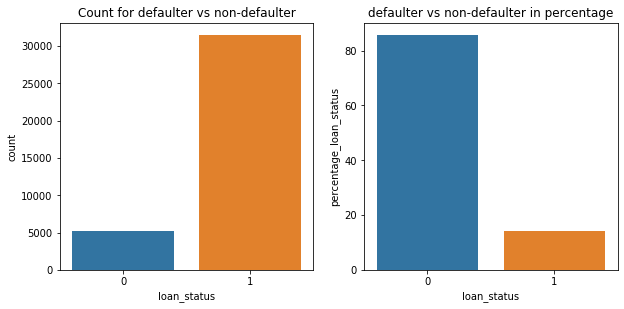

In [56]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
q=sns.countplot(x='loan_status',data=loan)
plt.title('Count for defaulter vs non-defaulter')

plt.subplot(2,2,2)
loan['percentage_loan_status']=loan.loan_status.value_counts()*100/len(loan)
sns.barplot(x="loan_status", y="percentage_loan_status", data=loan)
plt.title('defaulter vs non-defaulter in percentage')
plt.show()

In [57]:
loan.loan_status.value_counts()*100/len(loan)

1    85.837167
0    14.162833
Name: loan_status, dtype: float64

Analysis 1.0 : By comparing values in our target column "loan_status", we could find there are around 14% of the borrowers who have defaulted.

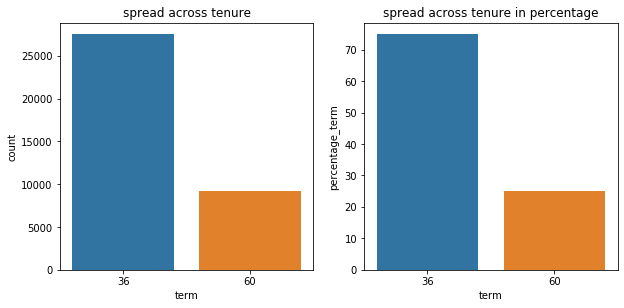

In [58]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
q=sns.countplot(x='term',data=loan)
plt.title('spread across tenure')

plt.subplot(2,2,2)
loan['percentage_term']=loan.term.value_counts()*100/len(loan)
sns.barplot(x="term", y="percentage_term", data=loan)
plt.title('spread across tenure in percentage')
plt.show()

In [59]:
loan.term.value_counts()*100/len(loan)

36    74.850968
60    25.149032
Name: term, dtype: float64

Analysis 1.1: There are two tenure listed one is for 36 months and another is for 60 months.And majority(~75%)of the loan is borrowed for the tenure of 36 months.

In [60]:
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
plt.hist(loan.int_rate,bins=30)
plt.show()
sns.distplot(loan.int_rate)
plt.show()

Analysis 2.0: By the distribution of interest rate, it looks like maximum number of loans disbursed with interest range of 10%-15%. 

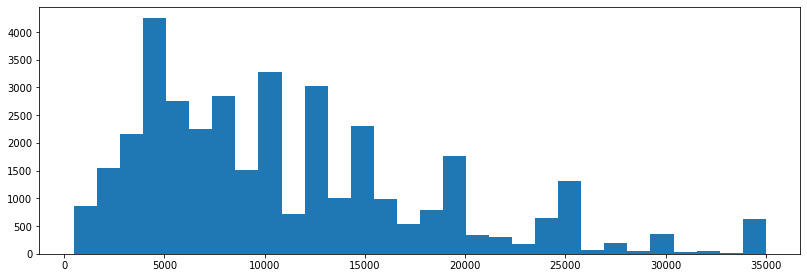

In [61]:
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
plt.hist(loan.loan_amnt,bins=30)
plt.show()
sns.distplot(loan.loan_amnt)
plt.show()

Analysis 2.2: By the distribution of loan amount, it looks like most number of loans are disbursed when amount is under 10000$. 

In [134]:
monthLoanStatus=pd.pivot_table(data=loan, values="term", index="emp_length", columns="loan_status", aggfunc='count')
monthLoanStatus.plot(kind='bar',stacked=True)
plt.show()

Pivot table above shows the spread of loan status among emp_length and term

In [119]:
# Analysing the distribution of loan based on purpose
loan.purpose.value_counts()
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
q=sns.countplot(x='purpose',hue='loan_status',data=loan)
plt.title('spread by purpose')
plt.xticks(rotation=45)
plt.show()

In [100]:
featurename1='purpose'
purpose=loan.groupby(by=featurename1).agg({'loan_status': ['mean','count','sum']}).reset_index()
purpose_group

purpose      mean  count    sum
0                  car  0.894332   1429   1278
1          credit_card  0.895977   4797   4298
2   debt_consolidation  0.850340  17346  14750
3          educational  0.840136    294    247
4     home_improvement  0.884291   2731   2415
5                house  0.838617    347    291
6       major_purchase  0.901951   2050   1849
7              medical  0.846512    645    546
8               moving  0.850277    541    460
9                other  0.840858   3588   3017
10    renewable_energy  0.817204     93     76
11      small_business  0.735437   1648   1212
12            vacation  0.853372    341    291
13             wedding  0.906426    887    804

In [ ]:
# looking at the data most frequent purposes are-
# 1. debt_consolidation
# 2. credit_card
# 3. home_improvement
# 4. major_purchase
# 5. small_business
# 6. car

In [120]:
featurenames=['purpose','emp_length']
feature_ana_frames = []
variation_percent = []
for featurename in featurenames:
    group=loan.groupby(by=featurename).agg({'loan_status': ['mean','count','sum']}).reset_index()
    group.columns=[featurename,'no_default_per','all','non_defaults']
    group['default_per'] = round( 100*(1 - group['no_default_per']),2)
    group['no_default_per'] = round(group['no_default_per']*100, 2)
    group['defaults'] = group['all'] - group['non_defaults']
    variation_percent.append(group['default_per'].max() - group['default_per'].min())
    feature_ana_frames.append(group)
feature_ana_frames


[               purpose  no_default_per    all  non_defaults  default_per  \
 0                  car           89.43   1429          1278        10.57   
 1          credit_card           89.60   4797          4298        10.40   
 2   debt_consolidation           85.03  17346         14750        14.97   
 3          educational           84.01    294           247        15.99   
 4     home_improvement           88.43   2731          2415        11.57   
 5                house           83.86    347           291        16.14   
 6       major_purchase           90.20   2050          1849         9.80   
 7              medical           84.65    645           546        15.35   
 8               moving           85.03    541           460        14.97   
 9                other           84.09   3588          3017        15.91   
 10    renewable_energy           81.72     93            76        18.28   
 11      small_business           73.54   1648          1212        26.46   

In [121]:
# comparing the variation of max% and min% among purpose and emp_length
# it looks like purpose is more likely to be a key indicator of default. 
variation_percent

[17.1, 2.780000000000001]

In [125]:
featurenames1=['grade','verification_status']
feature_ana_frames1 = []
variation_percent1 = []
for featurename in featurenames1:
    group=loan.groupby(by=featurename).agg({'loan_status': ['mean','count','sum']}).reset_index()
    group.columns=[featurename,'no_default_per','all','non_defaults']
    group['default_per'] = round( 100*(1 - group['no_default_per']),2)
    group['no_default_per'] = round(group['no_default_per']*100, 2)
    group['defaults'] = group['all'] - group['non_defaults']
    variation_percent1.append(group['default_per'].max() - group['default_per'].min())
    feature_ana_frames1.append(group)
feature_ana_frames1

[  grade  no_default_per    all  non_defaults  default_per  defaults
 0     A           94.26   9512          8966         5.74       546
 1     B           88.21  11136          9823        11.79      1313
 2     C           83.51   7452          6223        16.49      1229
 3     D           78.59   4839          3803        21.41      1036
 4     E           73.55   2567          1888        26.45       679
 5     F           67.63    939           635        32.37       304
 6     G           67.12    292           196        32.88        96,
   verification_status  no_default_per    all  non_defaults  default_per  \
 0        Not Verified           87.82  15521         13630        12.18   
 1     Source Verified           85.43   9470          8090        14.57   
 2            Verified           83.55  11746          9814        16.45   
 
    defaults  
 0      1891  
 1      1380  
 2      1932  ]

In [136]:
variation_percent1

[27.14, 4.27]

Comparing the variation of max% and min% among grade and verification_status . It looks like grade is more likely to be a key indicator of default. 
Going by the data it looks verification is not being done properly as we don’t find any major variation among the three categories listed. 
We could find higher the grade there are more chances of deaulters.

In [137]:
loan.shape

(36737, 24)

original loan dataset provided had shape of 39717x 111 and upon working using various EDA techniques our final dataset has reduced to shape of 36737x24. There were lot of junk columns and rows which we have deleted during our analysis